In [ ]:
%matplotlib inline


Unit cell
=========

This example shows how to display the unit cell with matplotlib.


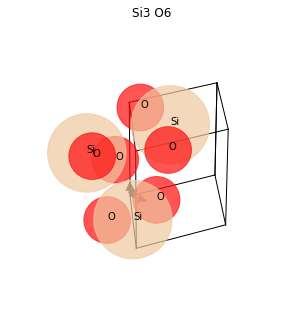

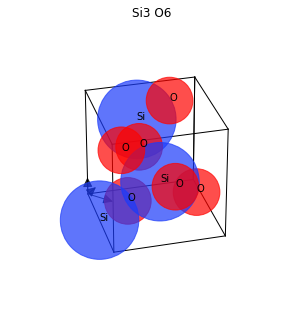

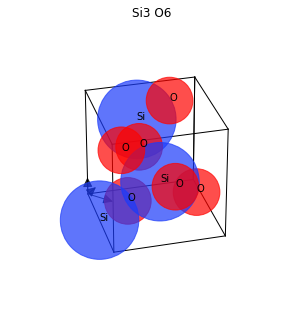

In [1]:
from abipy.abilab import abiopen
import abipy.data as abidata

# Extract structure from netcdf file.
with abiopen(abidata.ref_file("sio2_kpath_GSR.nc")) as gsr:
    structure = gsr.structure

# Visualize sites structure.
structure.plot(color_scheme="Jmol")

# Wrap sites into first unit cell.
# sphinx_gallery_thumbnail_number = 2
structure.plot(to_unit_cell=True)

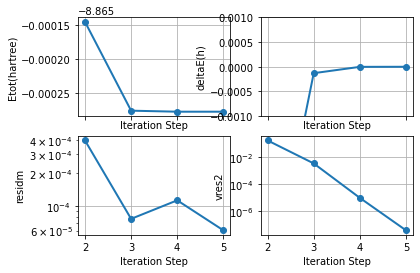

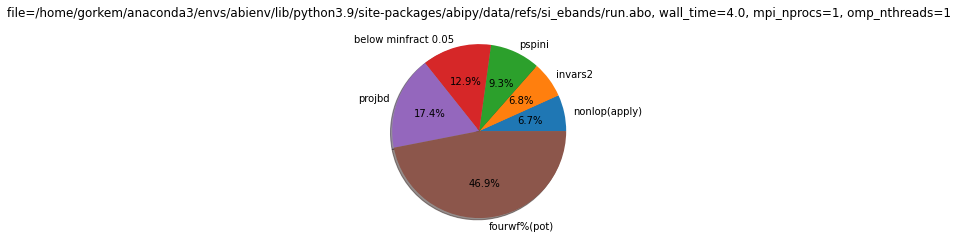

In [2]:
from abipy.abilab import abiopen
import abipy.data as abidata

# Open the output file with GS calculation (Note the .abo extension).
# Alternatively, one can use `abiopen.py run.abo -nb`
# to generate a jupyter notebook.
abo = abiopen(abidata.ref_file("refs/si_ebands/run.abo"))

# Plot all SCF-GS sections found in the output file.
# Use abo.next_d2de_scf_cycle() for DFPT cycles.
scf_cycle = abo.next_gs_scf_cycle()
if scf_cycle is not None:
    scf_cycle.plot()

# If timopt -1, we can extract the timing and plot the data.
timer = abo.get_timer()
timer.plot_pie()

abo.close()

================================= File Info =================================
Name: sio2_SCR.nc
Directory: /home/gorkem/anaconda3/envs/abienv/lib/python3.9/site-packages/abipy/data/refs/sio2_screening
Size: 426.16 kb
Access Time: Tue Nov 24 13:31:54 2020
Modification Time: Fri May 29 13:32:50 2020
Change Time: Mon Nov 23 17:33:33 2020

================================= Structure =================================
Full Formula (Si3 O6)
Reduced Formula: SiO2
abc   :   4.913040   4.913040   5.404630
angles:  90.000000  90.000000 120.000000
Sites (9)
  #  SP         a       b          c
---  ----  ------  ------  ---------
  0  Si     0.465   0       0
  1  Si     0       0.465   0.666667
  2  Si    -0.465  -0.465   0.333333
  3  O      0.415   0.272   0.12
  4  O     -0.143  -0.415   0.453333
  5  O     -0.272   0.143   0.786667
  6  O      0.143  -0.272  -0.12
  7  O      0.272   0.415   0.546667
  8  O     -0.415  -0.143   0.213333

Abinit Spacegroup: spgid: 0, num_spatial_symmetries: 6,

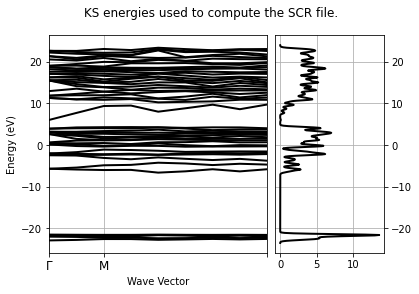

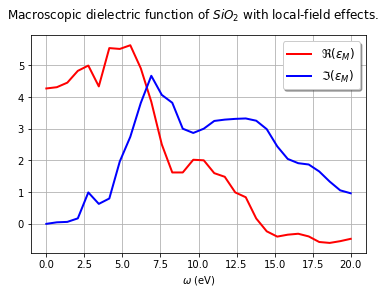

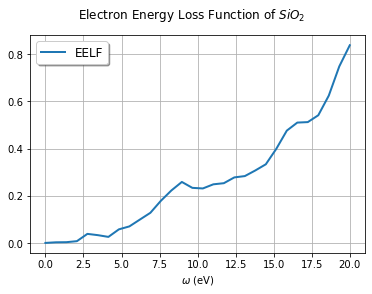

In [3]:
import abipy.data as abidata
from abipy.abilab import abiopen

with abiopen(abidata.ref_file("sio2_SCR.nc")) as ncfile:
    # The SCR file contains a structure and electron bands in the IBZ.
    # We can thus use the ebands object to plot bands + DOS.
    print(ncfile)

    edos = ncfile.ebands.get_edos()
    ncfile.ebands.plot_with_edos(edos, title="KS energies used to compute the SCR file.")

    # sphinx_gallery_thumbnail_number = 2
    ncfile.plot_emacro(title="Macroscopic dielectric function of $SiO_2$ with local-field effects.")

    ncfile.plot_eelf(title="Electron Energy Loss Function of $SiO_2$")

Full Formula (Al1 As1)
Reduced Formula: AlAs
abc   :   3.970101   3.970101   3.970101
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Al    0     0     0
  1  As    0.25  0.25  0.25

Abinit Spacegroup: spgid: 0, num_spatial_symmetries: 24, has_timerev: True, symmorphic: False
Zero point energy: 0.08400926480898568 eV 1.3459768111647533e-20 J 0.0030872835382053307 Ha


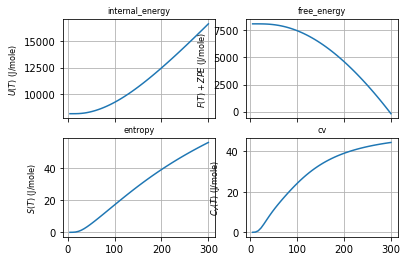

In [4]:
from __future__ import print_function

from abipy.abilab import abiopen
import abipy.data as abidata

# Read the Phonon DOS from the netcd file produced by anaddb (prtdos 2)
ncfile = abiopen(abidata.ref_file("trf2_5.out_PHDOS.nc"))
phdos = ncfile.phdos

# Print crystalline structure and zero-point energy.
print(ncfile.structure)
zpe = phdos.zero_point_energy
print("Zero point energy:", zpe, zpe.to("J"), zpe.to("Ha"))

# Compute free energy from 2 to 300 K (20 points)
# By default, energies are is eV and thermodynamic quantities are given
# on a per-unit-cell basis.
f = phdos.get_free_energy(tstart=2, tstop=300, num=20)
#f.plot()

# Plot U, F, S, Cv as a function of T.
# Use J/mol units, results are divided by formula_units.
phdos.plot_harmonic_thermo(units="Jmol", formula_units=1)

ncfile.close()

Full Formula (Si2)
Reduced Formula: Si
abc   :   3.866975   3.866975   3.866975
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Si    0     0     0
  1  Si    0.25  0.25  0.25

Abinit Spacegroup: spgid: 227, num_spatial_symmetries: 48, has_timerev: True, symmorphic: True
Density: nspinor: 1, nsppol: 1, nspden: 1
Mesh3D: nx=18, ny=18, nz=18


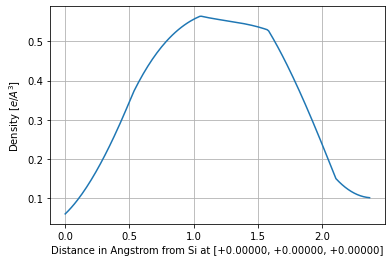

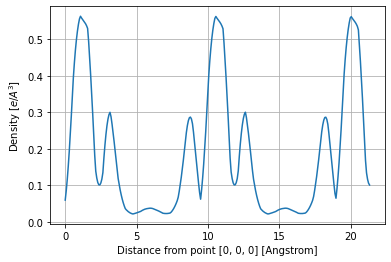

/home/gorkem/anaconda3/envs/abienv/lib/python3.9/site-packages/abipy/core/fields.py:413: FutureWarning: get_neighbors_old is deprecated; use get_neighbors in pymatgen.core.structure instead.
This is retained purely for checking purposes.
  nn_list = self.structure.get_neighbors_old(site, radius, include_index=True)


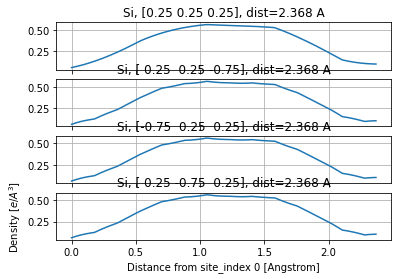

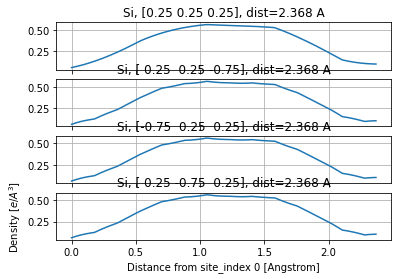

In [9]:
from abipy.abilab import abiopen
import abipy.data as abidata

# Open the DEN.nc file
ncfile = abiopen(abidata.ref_file("si_DEN.nc"))

# The DEN file has a `Density`, a `Structure` and an `ElectronBands` object
print(ncfile.structure)

# To plot the KS eigenvalues.
#ncfile.ebands.plot()

density = ncfile.density
print(density)

# To visualize the total charge wih vesta
#visu = density.visualize("vesta"); visu()

# To plot the density along the line connecting
# the first and the second in the structure:
density.plot_line(point1=0, point2=1)

# alternatively, one can define the line in terms of two points
# in fractional coordinates:
density.plot_line(point1=[0, 0, 0], point2=[2.25, 2.25, 2.25], num=300)

# To plot the density along the lines connect the firt atom in the structure
# and all the neighbors within a sphere of radius 3 Angstrom:
density.plot_line_neighbors(site_index=0, radius=3)

/home/gorkem/anaconda3/envs/abienv/lib/python3.9/site-packages/pymatgen/symmetry/kpath.py:180: UserWarning: The input structure does not match the expected standard primitive! The path can be incorrect. Use at your own risk.
  warn(


================================= File Info =================================
Name: mgb2_kpath_FATBANDS.nc
Directory: /home/gorkem/anaconda3/envs/abienv/lib/python3.9/site-packages/abipy/data/refs/mgb2_fatbands
Size: 149.01 kb
Access Time: Tue Nov 24 18:34:00 2020
Modification Time: Fri May 29 13:32:50 2020
Change Time: Mon Nov 23 17:33:33 2020

================================= Structure =================================
Full Formula (Mg1 B2)
Reduced Formula: MgB2
abc   :   3.086000   3.086000   3.523000
angles:  90.000000  90.000000 120.000000
Sites (3)
  #  SP           a         b    c
---  ----  --------  --------  ---
  0  Mg    0         0         0
  1  B     0.333333  0.666667  0.5
  2  B     0.666667  0.333333  0.5

Abinit Spacegroup: spgid: 191, num_spatial_symmetries: 24, has_timerev: True, symmorphic: False

============================== Electronic Bands ==============================
================================= Structure =================================
Full Formu

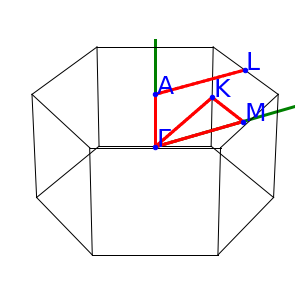

/home/gorkem/anaconda3/envs/abienv/lib/python3.9/site-packages/pymatgen/symmetry/kpath.py:180: UserWarning: The input structure does not match the expected standard primitive! The path can be incorrect. Use at your own risk.
  warn(


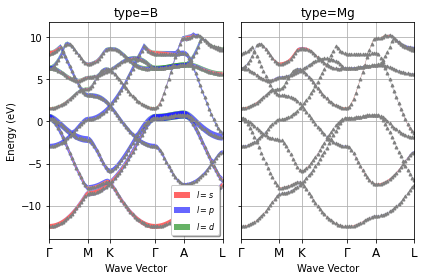

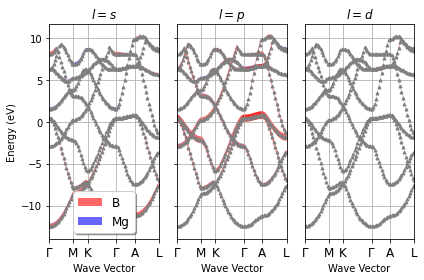

================================= File Info =================================
Name: mgb2_kmesh181818_FATBANDS.nc
Directory: /home/gorkem/anaconda3/envs/abienv/lib/python3.9/site-packages/abipy/data/refs/mgb2_fatbands
Size: 480.70 kb
Access Time: Tue Nov 24 18:14:21 2020
Modification Time: Fri May 29 13:32:50 2020
Change Time: Mon Nov 23 17:33:33 2020

================================= Structure =================================
Full Formula (Mg1 B2)
Reduced Formula: MgB2
abc   :   3.086000   3.086000   3.523000
angles:  90.000000  90.000000 120.000000
Sites (3)
  #  SP           a         b    c
---  ----  --------  --------  ---
  0  Mg    0         0         0
  1  B     0.333333  0.666667  0.5
  2  B     0.666667  0.333333  0.5

Abinit Spacegroup: spgid: 191, num_spatial_symmetries: 24, has_timerev: True, symmorphic: False

============================== Electronic Bands ==============================
================================= Structure =================================
Full

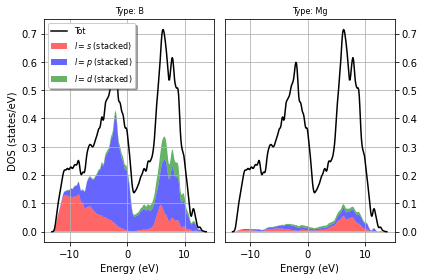

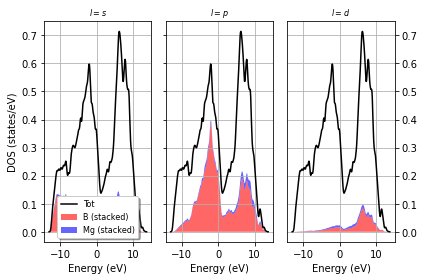

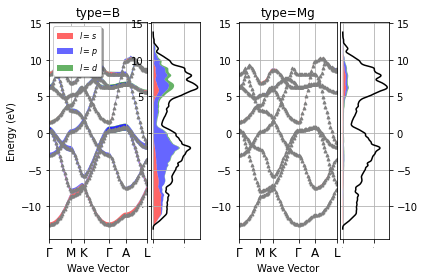

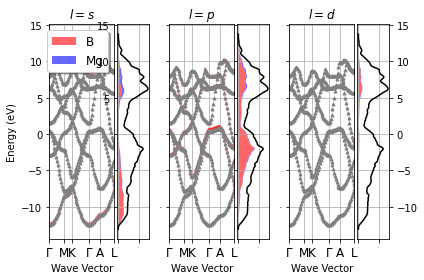

In [2]:
import abipy.abilab as abilab
import abipy.data as abidata

# Open the file (alternatively one can use the shell and `abiopen.py FILE -nb`
# to open the file in a jupyter notebook
# This file has been produced on a k-path so it's not suitable for DOS calculations.
fbnc_kpath = abilab.abiopen(abidata.ref_file("mgb2_kpath_FATBANDS.nc"))

# Print file info (dimensions, variables ...)
# Note that prtdos = 3, so LM decomposition is not available.
print(fbnc_kpath)


# Plot the k-points belonging to the path.
fbnc_kpath.ebands.kpoints.plot()

# NC files have contributions up to L=4 (g channel)
# but here we are intererested in s,p,d terms only so
# we use the optional argument lmax
lmax = 2

# Plot the electronic fatbands grouped by atomic type.
fbnc_kpath.plot_fatbands_typeview(lmax=lmax, tight_layout=True)

# Plot the electronic fatbands grouped by L.
fbnc_kpath.plot_fatbands_lview(lmax=lmax, tight_layout=True)

# Now we read another FATBANDS file produced on 18x18x18 k-mesh
fbnc_kmesh = abilab.abiopen(abidata.ref_file("mgb2_kmesh181818_FATBANDS.nc"))

print(fbnc_kmesh)
#fbnc_kmesh.ebands.kpoints.plot()

# Plot the L-PJDOS grouped by atomic type.
fbnc_kmesh.plot_pjdos_typeview(lmax=lmax, tight_layout=True)

# Plot the L-PJDOS grouped by L.
fbnc_kmesh.plot_pjdos_lview(lmax=lmax, tight_layout=True)

# Now we use the two netcdf files to produce plots with fatbands + PJDOSEs.
# The data for the DOS is taken from pjdosfile.
# sphinx_gallery_thumbnail_number = 6
fbnc_kpath.plot_fatbands_with_pjdos(pjdosfile=fbnc_kmesh, lmax=lmax,
                                    view="type", tight_layout=True)

# fatbands + PJDOS grouped by L
fbnc_kpath.plot_fatbands_with_pjdos(pjdosfile=fbnc_kmesh, lmax=lmax,
                                    view="lview", tight_layout=True)

fbnc_kpath.close()
fbnc_kmesh.close()